In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
import antigranular as ag
session = ag.login("yveemYmiUV93QmAJlwv3dQ9DvbISuTrJ", "CadbiOM3+dIU+7rfUIPCryYNtN92xLC0UovJA65/z394+l6dInUBrlueleJlqpEF", dataset = "Car Evaluation")

C:\Users\taori\Desktop\users\AntigranularClient\antigranular\client.py:143: UserWarning: Antigranular client version 0.2.14 not in supported clients list shared by the server, please update antigranular client to the latest version.
  warnings.warn(


Output: Time taken to convert metadata keys to tuples: 2.384185791015625e-06 seconds
Time taken to create train_x DataFrame: 0.003745555877685547 seconds
train_x None None
Time taken to create PrivateDataFrame: 0.0024962425231933594 seconds
Time taken to create train_y DataFrame: 0.0017077922821044922 seconds
train_y None None
Time taken to create PrivateDataFrame: 0.0008227825164794922 seconds
Time taken to create test_x DataFrame: 0.0018532276153564453 seconds
Time taken to create test_y DataFrame: 0.0019063949584960938 seconds
test_y None None
Time taken to create PrivateDataFrame: 0.001972675323486328 seconds
Dataset "Car Evaluation" loaded to the kernel as car_evaluation
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      
test_y                         PrivateDataFrame

Connected to Antigranular serv

In [ ]:
%%ag
import pandas as pd

In [ ]:
%%ag
train_x = car_evaluation["train_x"]
train_y = car_evaluation["train_y"]
test_x = car_evaluation["test_x"]

ag_print(train_x.columns)
ag_print(train_y.columns)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
['class']



In [ ]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Data Preprocessing

In [ ]:
%%ag
unique_categories = {}
for column in test_x.columns:
    unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)


{'buying': ['high', 'med', 'low', 'vhigh'], 'maint': ['high', 'low', 'vhigh', 'med'], 'doors': ['4', '2', '5more', '3'], 'persons': ['2', '4', 'more'], 'lug_boot': ['med', 'big', 'small'], 'safety': ['high', 'med', 'low']}



In [ ]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'buying': {'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}, 'doors': {'4': 0, '2': 1, '5more': 2, '3': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 0, 'big': 1, 'small': 2}, 'safety': {'high': 0, 'med': 1, 'low': 2}}



In [ ]:
%%ag
encoding_scheme_train_x = {'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}


In [ ]:
%%ag
ag_print(encoding_scheme_train_x)

{'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}



Apply Encoding for train_x

In [ ]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

Apply encoding train_y

In [ ]:
%%ag
train_y_schema = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

train_y[train_y.columns[0]] = train_y[train_y.columns[0]].map(train_y_schema, eps=1)

In [ ]:
%%ag
ag_print(train_y.describe(eps=.1))

             class
count  1116.000000
mean      0.593356
std       1.023238
min       0.000000
25%       0.006903
50%       1.180016
75%       0.723280
max       2.406134



## Data Visualization

Join two dataset train_x and train_y

In [ ]:
%%ag
train_data = train_x.join(train_y, how="inner")

In [ ]:
%%ag
import op_snsql

/usr/local/lib/python3.10/site-packages/opendp/typing.py:28: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: 'bool',  # np.bool_



In [ ]:
%%ag
privacy = op_snsql.Privacy(epsilon=1.0)
reader = op_snsql.from_df(df=train_data, privacy=privacy)

In [ ]:
%%ag
result = reader.execute("SELECT class, AVG(buying), AVG(maint), AVG(doors), AVG(persons), AVG(lug_boot), AVG(safety) FROM df.table GROUP BY class")
export(result, 'result')

Setting up exported variable in local environment: result


In [ ]:
%%ag
export(train_x.columns, 'train_x_columns')

Setting up exported variable in local environment: train_x_columns


In [ ]:
new_columns = ['class'] + train_x_columns
df = pd.DataFrame(result[1:], columns=new_columns)

In [ ]:
df

,class,buying,maint,doors,persons,lug_boot,safety
0,0,1.603077,1.649231,1.209446,0.809231,0.935318,0.742564
1,1,1.461794,1.387417,1.322259,1.535117,1.115512,1.514950
2,2,0.300000,0.275862,1.413793,1.333333,1.116667,1.474576
3,3,0.479167,0.812500,1.166667,1.408163,1.604167,1.900000


In [ ]:
df.drop(columns=['class'], inplace=True)

<Axes: >

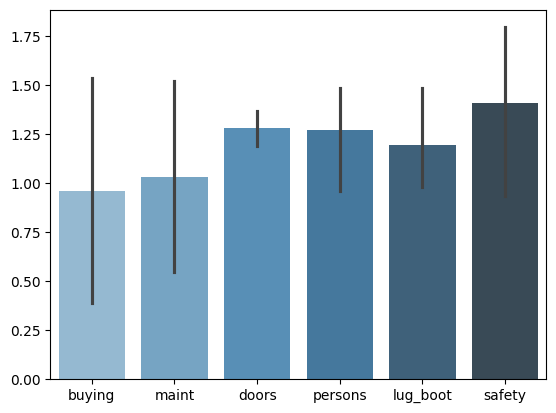

In [ ]:
# sns barplot
sns.barplot(data=df, palette="Blues_d")

Observations:

- **buying**: There are noticeable differences in the mean buying price among different classes.
- **maint**: Similar to buying, maintenance cost also shows some variation.
- **safety**: Safety shows clear variations, and looks like ***most important***.
  
The remaining features (**doors**, **persons**, **lug_boot**) exhibit less variation among classes.

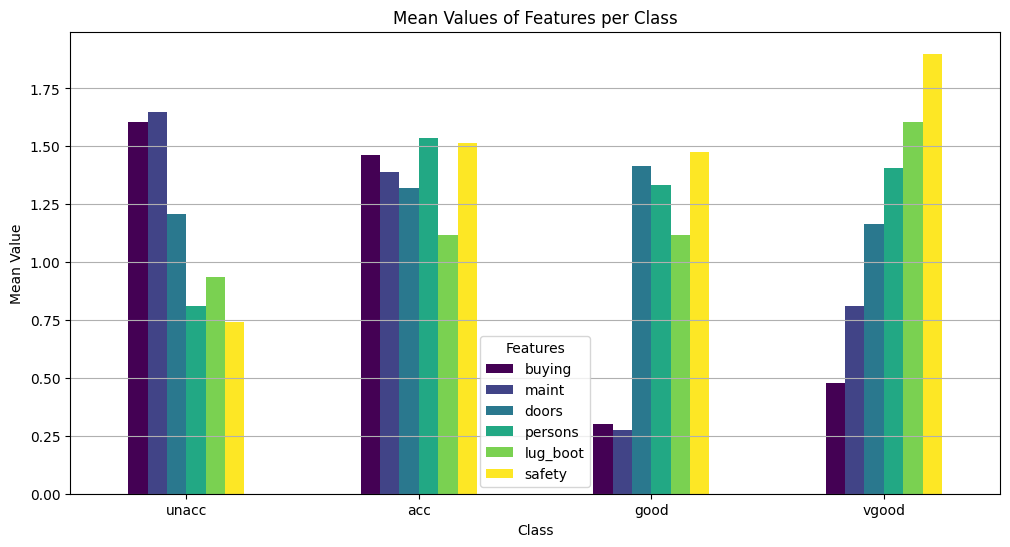

In [ ]:
ax = df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Features per Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unacc', 'acc', 'good', 'vgood'], rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')

## Observations:
1. **Safety Considerations:**
   - 'vgood' cars tend to have the highest mean safety rating, suggesting that safety is a crucial factor in determining the highest class of cars.
   - 'unacc' (unacceptable) cars have the lowest mean safety rating, highlighting that lower safety ratings are a significant factor for classifying cars into this undesirable category.

2. **Economic Aspects (Buying & Maintenance):**
   - 'unacc' cars tend to have higher mean buying and maintenance costs, indicating that more expensive and high-maintenance cars are often deemed less acceptable.
   - 'good' cars have the lowest mean buying and maintenance costs, hinting that more economically friendly cars are often classified in this category.

3. **Luggage Boot Size:**
   - 'vgood' cars have the highest mean luggage boot size, showing a potential preference for larger boot sizes in this class.
   - The other classes do not show significant variations in the luggage boot size.

4. **Capacity (Persons & Doors):**
   - 'unacc' cars have a lower mean value for persons, suggesting that cars with lower seating capacity tend to be categorized as unacceptable.
   - There isn't a clear pattern for the number of doors across classes, implying that this feature might not be as impactful in classifying cars.

### Summary:

- Safety is a pivotal factor across all classes, with higher safety ratings generally correlating with more favorable classes.
- Economic aspects (buying and maintenance costs) appear to significantly impact the classification, especially distinguishing 'unacc' and 'good' cars.
- Features like the number of doors might not be significant in determining car classes due to the lack of clear variation across different classes.

This analysis could inform the feature selection or weighting in a predictive model, focusing on safety and economic aspects as potentially influential variables.

In [ ]:
%%ag
ag_print(train_data['class'].describe(eps=1))

count    1421.000000
mean        0.354594
std         0.656077
min         0.000000
25%         0.000269
50%         0.000478
75%         0.815907
max         2.870428
Name: series, dtype: float64



In [ ]:
session.privacy_odometer()

{'total_epsilon_used': 21.1,
 'total_delta_used': 1.5543122344752192e-15,
 'library_costs': None,
 'dataset_costs': None}

## Rule based Model

In [ ]:
%%ag
# encode test x
for col, value in encoding_scheme_train_x.items():
    test_x[col] = test_x[col].map(value)

In [ ]:
%%ag
ag_print(test_x)

     buying  maint  doors  persons  lug_boot  safety
0         2      2      2        0         1       2
1         1      0      0        1         1       1
2         2      2      2        0         2       1
3         0      2      2        1         1       1
4         1      0      2        2         1       0
..      ...    ...    ...      ...       ...     ...
341       3      3      2        2         0       1
342       3      1      2        0         1       1
343       1      0      0        2         0       0
344       3      3      2        2         0       2
345       1      1      0        0         1       1

[346 rows x 6 columns]



In [ ]:
%%ag
result = reader.execute("SELECT count(class) FROM df.table GROUP BY class")


In [ ]:
%%ag
ag_print(result)

[['???'], [975], [302], [58], [46]]



In [ ]:
%%ag
export(result, 'result')

Setting up exported variable in local environment: result


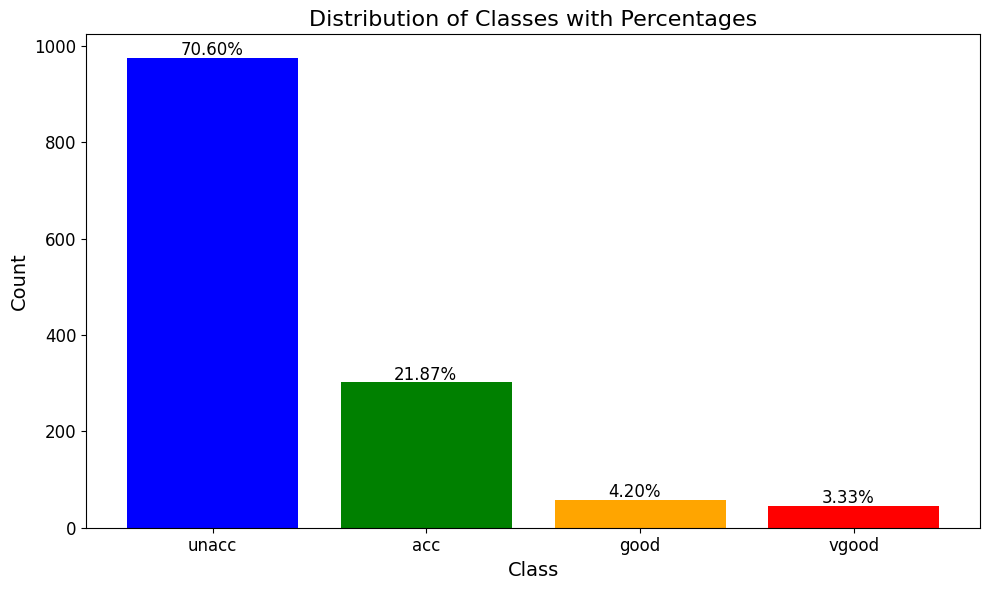

In [ ]:
data_counts = [item[0] for item in result[1:]]
labels = ['unacc', 'acc', 'good', 'vgood']

total_count = sum(data_counts)

# Calculate percentages
percentages = [(count/total_count)*100 for count in data_counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, data_counts, color=['blue', 'green', 'orange', 'red'])

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, # position percentage at the top
             bar.get_height() + 5,
             f'{percentage:.2f}%',
             fontsize=12)

plt.title('Distribution of Classes with Percentages', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Observations:
* The data is imbalanced, with the 'unacc' category dominating the distribution.
* 'vgood' and 'good' categories are considerably very less frequent in the data.

The class 'unacc' has the highest count and represents the majority of the data, hence can be default for rule based model

In [ ]:
%%ag
# simple rule based
def rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        if row['safety'] == 0:
            predictions.append('unacc')
        elif row['buying'] == 0 and row['maint'] == 0:
            predictions.append('acc')
        else:
            predictions.append('unacc')
    return predictions

In [ ]:
%%ag
predictions = rule_based_model(test_x)

In [ ]:
session.terminate_session()

{'status': 'ok'}